In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
alternative = pd.read_csv('/Users/viviandong/Downloads/COMP309/COMP309 - A3/Data/Original Data/training-data/alternative.csv')
blues = pd.read_csv('/Users/viviandong/Downloads/COMP309/COMP309 - A3/Data/Original Data/training-data/blues.csv')
childrens_music = pd.read_csv('/Users/viviandong/Downloads/COMP309/COMP309 - A3/Data/Original Data/training-data/childrens music.csv')
comedy = pd.read_csv('/Users/viviandong/Downloads/COMP309/COMP309 - A3/Data/Original Data/training-data/comedy.csv')
electronic = pd.read_csv('/Users/viviandong/Downloads/COMP309/COMP309 - A3/Data/Original Data/training-data/electronic.csv')
folk = pd.read_csv('/Users/viviandong/Downloads/COMP309/COMP309 - A3/Data/Original Data/training-data/folk.csv')
hip_hop = pd.read_csv('/Users/viviandong/Downloads/COMP309/COMP309 - A3/Data/Original Data/training-data/hip-hop.csv')
movie = pd.read_csv('/Users/viviandong/Downloads/COMP309/COMP309 - A3/Data/Original Data/training-data/movie.csv')
ska = pd.read_csv('/Users/viviandong/Downloads/COMP309/COMP309 - A3/Data/Original Data/training-data/ska.csv')
soul = pd.read_csv('/Users/viviandong/Downloads/COMP309/COMP309 - A3/Data/Original Data/training-data/soul.csv')

training = pd.concat([alternative,blues,childrens_music,comedy,electronic,folk,hip_hop,movie,ska,soul])
test = pd.read_csv('/Users/viviandong/Downloads/COMP309/COMP309 - A3/Data/Original Data/test-data/test.csv')

# Exploring and understanding the Data

## Basic information about data

In [3]:
training.head()

instance_id              artist_name                     track_name  \
0        50010                  Chromeo  Come Alive (feat. Toro Y Moi)   
1        50011                    Sango             How Do You Love Me   
2        50012           Counting Crows                          Omaha   
3        50013  Bullet For My Valentine                        Over It   
4        50014                Shinedown                  Asking For It   

                 track_id  popularity  acousticness  danceability  \
0  0ZulY8etRzj54NLYOYX7jy          43      0.225000         0.845   
1  1jgkBLmR16qqZzEG5LYZN5          47      0.665000         0.862   
2  50o13VmOJiUj3WfU7XmEAn          48      0.238000         0.590   
3  5BRGRuHRfvGgoIvZg3PE3x          60      0.000077         0.374   
4  0BpgI6YcYv3ENGLp7XJsAH          58      0.002730         0.449   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0       238680   0.746          0.000088   F    0.0785    -5.655  Minor   
1       166154   0.342          0.000082  A#    0.1020   -10.095  Minor   
2       219400   0.517          0.000000   A    0.1820    -9.239  Major   
3           -1   0.971          0.000000   B    0.3220    -4.284  Minor   
4           -1   0.971          0.000000  A#    0.1410    -3.660  Major   

   speechiness    tempo time_signature  valence        genre  
0       0.0383   129.97          4-Apr    0.961  Alternative  
1       0.0551  129.992          4-Apr    0.177  Alternative  
2       0.0312   80.883          4-Apr    0.566  Alternative  
3       0.0697   97.625          4-Apr    0.701  Alternative  
4       0.0476  144.031          4-Apr    0.414  Alternative

In [4]:
training.shape

(50000, 19)

There are 50,000 training instances and 5000 instances for each genre, so the classes are balanced.

There are 19 variables, including track id, its genre and 17 features for classification: 7 categorical variables and 12 numerical variables.

artist_name, track_name, track_id and time_signature are basic information about each song (instance).

Here is the explanation for variables that are related to the audio features to help us understand what each of the features represents:
- Popularity: A measure of how popular a song is.

- Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is the least danceable, and 1.0 is the most danceable.

- Duration_ms: The duration of a song in milliseconds.

- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- Key: the note or chord the music is centered around, including 'F', 'A#', 'A', 'B', 'D', 'G', 'D#', 'C', 'F#', 'G#', 'E', 'C#'.

- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.

- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

- Mode: The modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1, and minor is 0.

- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). 

- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

All the numeric variables have the range from 0 to 1, excluding popularity, loudness and tempo.

Most of the explanations for audio features are from here: https://www.therecordindustry.io/analyzing-spotify-audio-features/

In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  int64  
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   track_id          50000 non-null  object 
 4   popularity        50000 non-null  int64  
 5   acousticness      50000 non-null  float64
 6   danceability      50000 non-null  float64
 7   duration_ms       50000 non-null  int64  
 8   energy            50000 non-null  float64
 9   instrumentalness  50000 non-null  float64
 10  key               50000 non-null  object 
 11  liveness          50000 non-null  float64
 12  loudness          50000 non-null  float64
 13  mode              50000 non-null  object 
 14  speechiness       50000 non-null  float64
 15  tempo             50000 non-null  object 
 16  time_signature    50000 non-null  object 

In [6]:
training.describe()

instance_id    popularity  acousticness  danceability   duration_ms  \
count   50000.0000  50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   126285.9000     37.680800      0.350953      0.572506  1.817114e+05   
std     79504.4176     18.205972      0.342806      0.159419  1.456144e+05   
min     43000.0000      0.000000      0.000001      0.061700 -1.000000e+00   
25%     62500.7500     25.000000      0.024900      0.467000  1.078498e+05   
50%    102540.5000     41.000000      0.219000      0.576000  1.953085e+05   
75%    170499.2500     51.000000      0.699000      0.685000  2.469362e+05   
max    313859.0000     96.000000      0.996000      0.989000  4.830606e+06   

             energy  instrumentalness      liveness      loudness  \
count  50000.000000      50000.000000  50000.000000  50000.000000   
mean       0.618753          0.093378      0.256996     -8.736643   
std        0.242324          0.231847      0.238818      4.396351   
min        0.000216          0.000000      0.012400    -38.445000   
25%        0.445000          0.000000      0.101000    -11.040000   
50%        0.641000          0.000033      0.144000     -7.820000   
75%        0.825000          0.010600      0.326000     -5.562000   
max        0.999000          0.993000      1.000000      3.744000   

        speechiness       valence  
count  50000.000000  50000.000000  
mean       0.172855      0.485764  
std        0.258632      0.247137  
min        0.022200      0.000000  
25%        0.037400      0.289000  
50%        0.057600      0.477000  
75%        0.153000      0.676000  
max        0.965000      1.000000

## Duplicate values

In [7]:
training.duplicated().sum()

0

The function returned ‘0’. This means, there is not a single duplicate value present in our dataset.

## Unique values in the data

In [8]:
print(training['key'].unique())
print(test['key'].unique())

['F' 'A#' 'A' 'B' 'D' 'G' 'D#' 'C' 'F#' 'G#' 'E' 'C#']
['F#' 'G#' 'E' 'B' 'G' 'D' 'D#' 'C#' 'A#' 'A' 'F' 'C']


In [9]:
print(training['mode'].unique())
print(test['mode'].unique())

['Minor' 'Major']
['Minor' 'Major']


In [10]:
print(training['time_signature'].unique())
print(test['time_signature'].unique())

['4-Apr' '3-Apr' '1-Apr' '5-Apr']
['4-Apr' '3-Apr' '1-Apr' '5-Apr' '0/4']


It’s good to know the categories for these categorical variables.

Based on the tables and Kaggle Data Explorer page, I’ve noticed:

- Missing artist_name are input as 'empty_field'.

- tempo is treated as an object here because the missing value is entered as ‘?’.

- duration_ms has negative values because from the above table, the minimum value is -1. These should be treated as missing values since the length of a song can’t be negative.

- time_signature has 0/4 in the test set, and it’s not a reasonable value, so I’m assuming these are missing values. It also looks like the values have been encoded as date, but it’s actually 4/4, 3/4, 1/4, and 5/5 for the time signature.

## Correlation Between Variables

In [11]:
training.corr()

instance_id  popularity  acousticness  danceability  \
instance_id          1.000000   -0.245043      0.015847      0.077352   
popularity          -0.245043    1.000000     -0.372796      0.128683   
acousticness         0.015847   -0.372796      1.000000     -0.105855   
danceability         0.077352    0.128683     -0.105855      1.000000   
duration_ms          0.050254    0.055100     -0.038334     -0.036814   
energy               0.155020    0.150871     -0.601454     -0.030583   
instrumentalness     0.242293   -0.068177      0.003627     -0.071595   
liveness             0.227449   -0.243377      0.249236     -0.120213   
loudness            -0.009034    0.319603     -0.612320      0.080699   
speechiness          0.290613   -0.254632      0.375212      0.051984   
valence             -0.111512   -0.091996     -0.150105      0.365973   

                  duration_ms    energy  instrumentalness  liveness  loudness  \
instance_id          0.050254  0.155020          0.242293  0.227449 -0.009034   
popularity           0.055100  0.150871         -0.068177 -0.243377  0.319603   
acousticness        -0.038334 -0.601454          0.003627  0.249236 -0.612320   
danceability        -0.036814 -0.030583         -0.071595 -0.120213  0.080699   
duration_ms          1.000000  0.021658          0.057377  0.021080  0.007553   
energy               0.021658  1.000000         -0.082568  0.188412  0.743329   
instrumentalness     0.057377 -0.082568          1.000000 -0.110810 -0.166041   
liveness             0.021080  0.188412         -0.110810  1.000000 -0.088891   
loudness             0.007553  0.743329         -0.166041 -0.088891  1.000000   
speechiness          0.021675  0.100811         -0.168358  0.638230 -0.202082   
valence             -0.079157  0.202685         -0.130290 -0.066283  0.163501   

                  speechiness   valence  
instance_id          0.290613 -0.111512  
popularity          -0.254632 -0.091996  
acousticness         0.375212 -0.150105  
danceability         0.051984  0.365973  
duration_ms          0.021675 -0.079157  
energy               0.100811  0.202685  
instrumentalness    -0.168358 -0.130290  
liveness             0.638230 -0.066283  
loudness            -0.202082  0.163501  
speechiness          1.000000 -0.089608  
valence             -0.089608  1.000000

<AxesSubplot:>

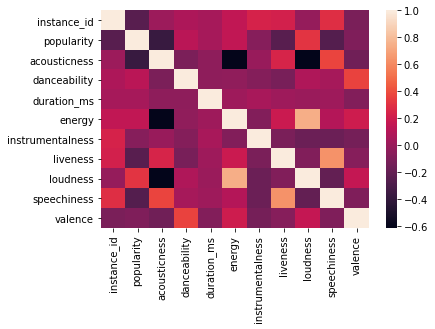

In [12]:
sns.heatmap(training.corr())

In [13]:
corr = training.corr()
sorted_corr = corr.unstack().sort_values()

print(sorted_corr[:5])

acousticness  loudness       -0.612320
loudness      acousticness   -0.612320
acousticness  energy         -0.601454
energy        acousticness   -0.601454
acousticness  popularity     -0.372796
dtype: float64


In [14]:
print(sorted_corr[-20:])

popularity        loudness            0.319603
danceability      valence             0.365973
valence           danceability        0.365973
acousticness      speechiness         0.375212
speechiness       acousticness        0.375212
                  liveness            0.638230
liveness          speechiness         0.638230
loudness          energy              0.743329
energy            loudness            0.743329
instance_id       instance_id         1.000000
energy            energy              1.000000
loudness          loudness            1.000000
liveness          liveness            1.000000
instrumentalness  instrumentalness    1.000000
duration_ms       duration_ms         1.000000
danceability      danceability        1.000000
acousticness      acousticness        1.000000
popularity        popularity          1.000000
speechiness       speechiness         1.000000
valence           valence             1.000000
dtype: float64


We have 4 large correlations:

- energy - loudness: 0.743329

- liveness - speechiness: 0.638230

- acousticness - loudness: -0.612320

- acousticness - energy: -0.601454
    
We need to consider the effect of multicollinearity, and it can help in feature selection.
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable.

array([[<AxesSubplot:title={'center':'instance_id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>]],
      dtype=object)

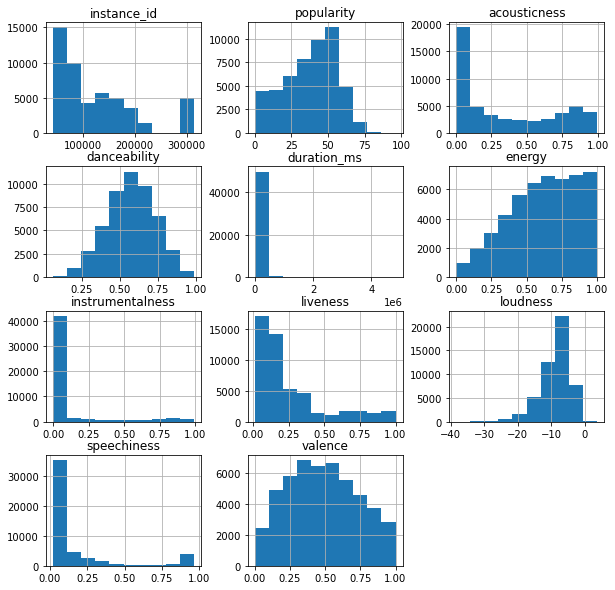

In [15]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
training.hist(ax = ax)
#training.hist();

- The majority of songs have tended toward “not acoustic”.

- An excellent normal distribution here shows that songs are relatively evenly split as far as their danceability.

- The majority of songs have tended to be high-energy.

- Most songs are not instrumentals or speechiness.

- Most songs are not recorded on live, so the vast majority of songs have been studio recordings.

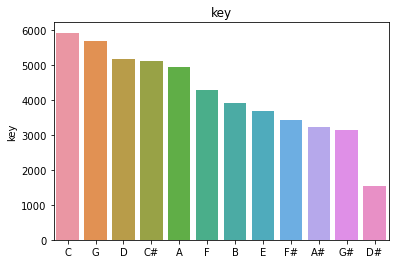

In [16]:
sns.barplot(training["key"].value_counts().index, training["key"].value_counts()).set_title("key")
plt.show()

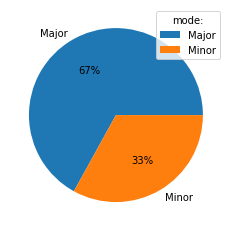

In [17]:
plt.pie(training["mode"].value_counts(), labels = training["mode"].value_counts().index, autopct='%1.0f%%')
plt.legend(title = "mode:")
plt.show() 

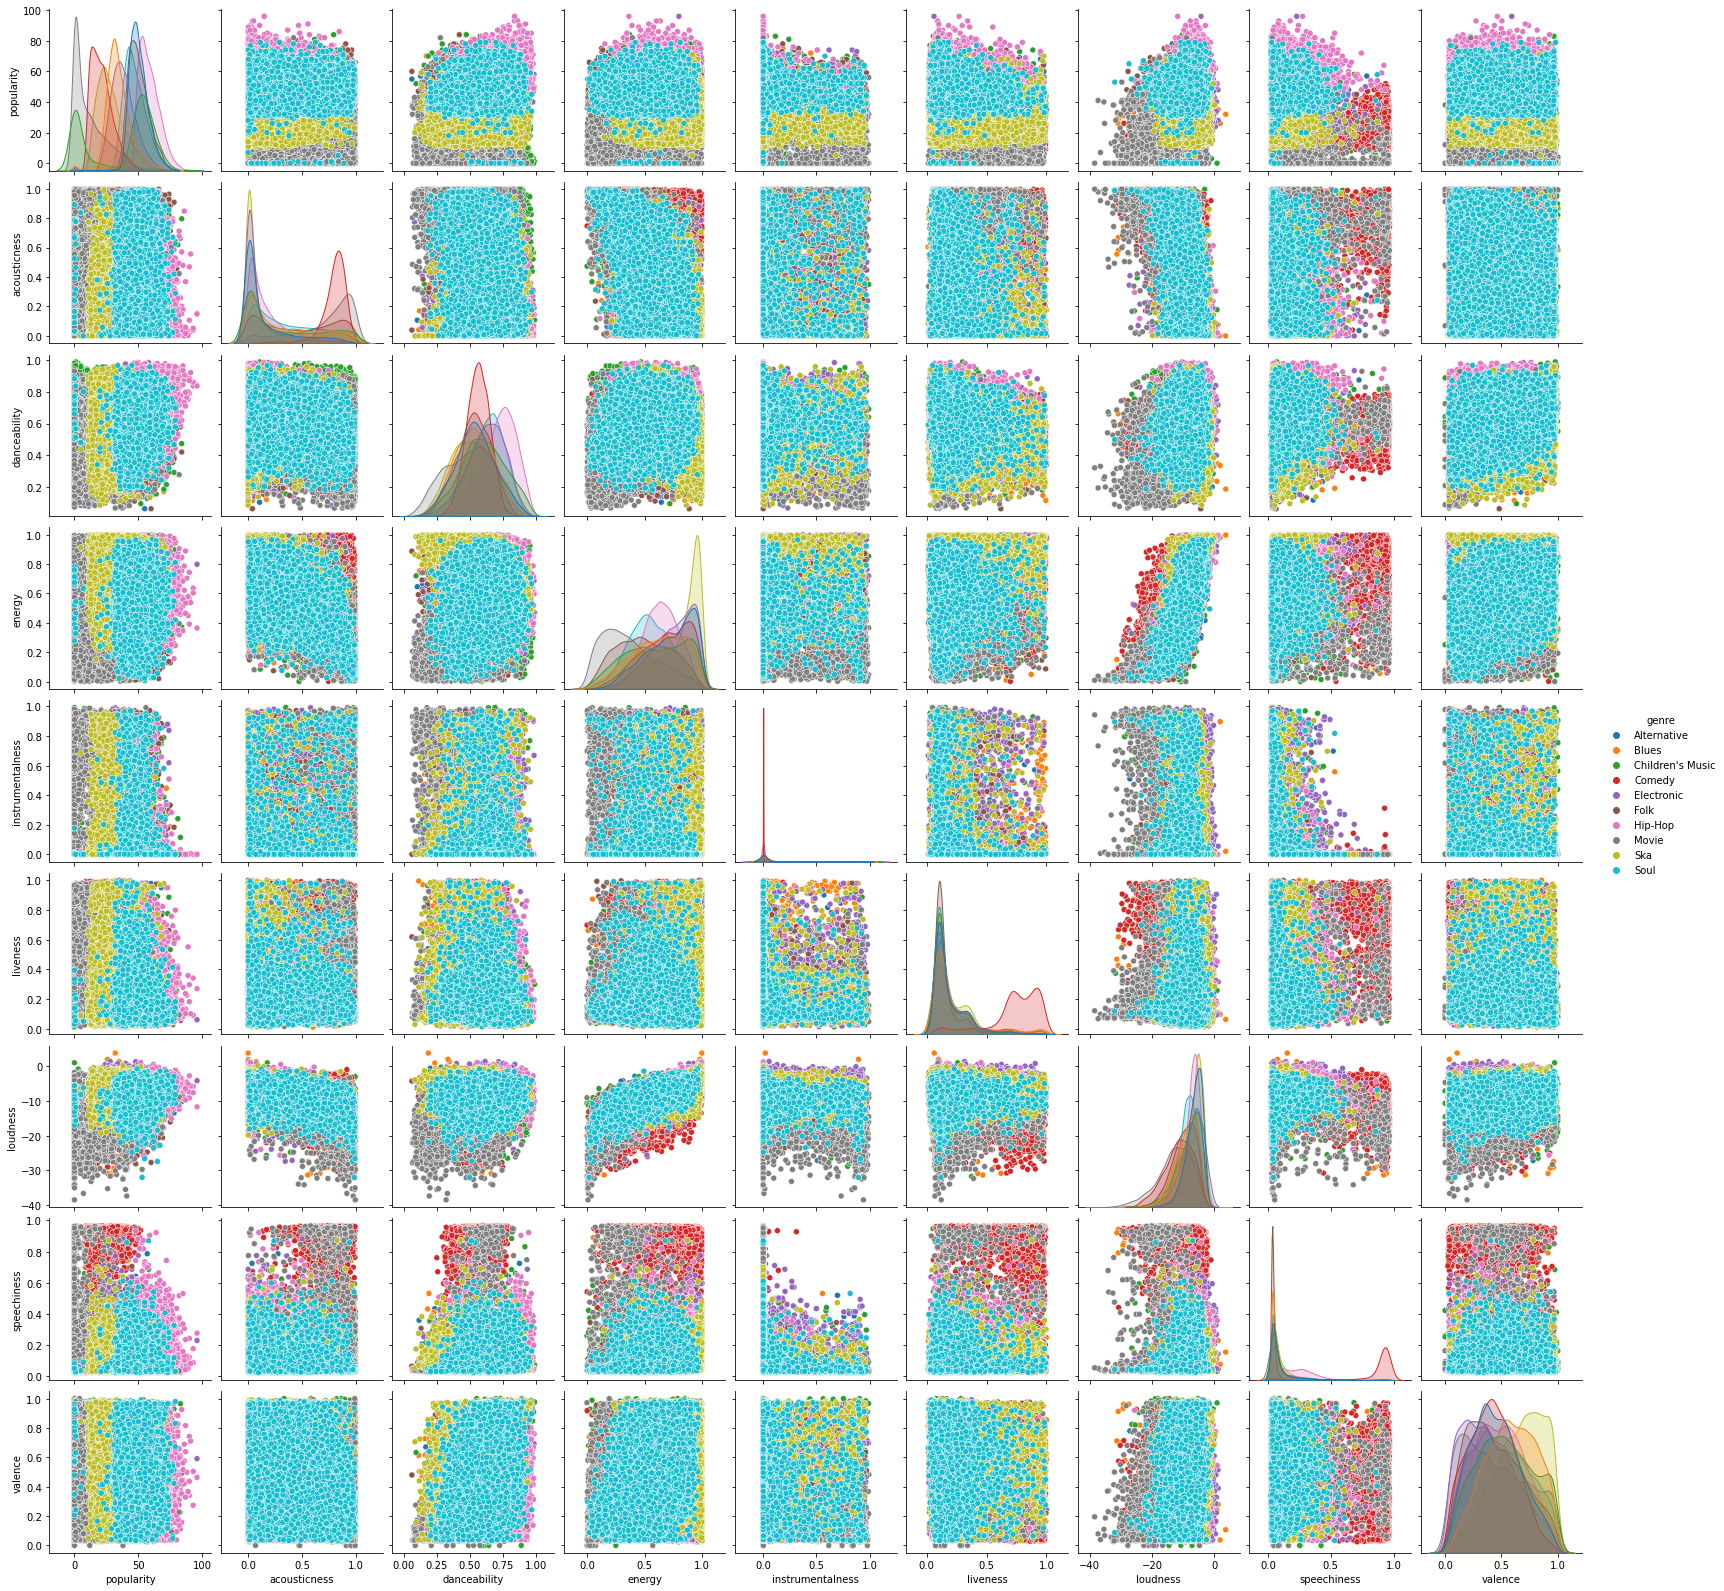

In [18]:
sns.pairplot(training,
             hue="genre",
             vars=['popularity','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','valence'])

Look at the above pair plot, and I’ve noticed some interesting trends. So let’s take a look at these plots individually.

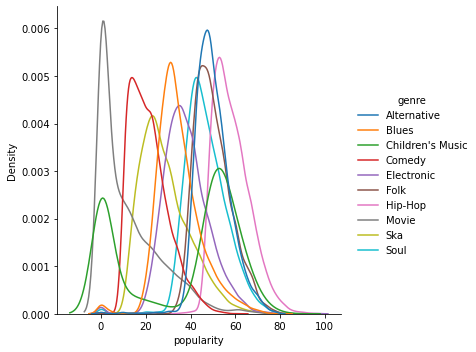

In [19]:
sns.displot(data=training, x="popularity", hue="genre", kind="kde")

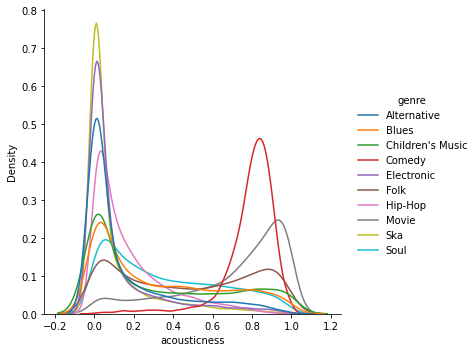

In [20]:
sns.displot(data=training, x="acousticness", hue="genre", kind="kde")

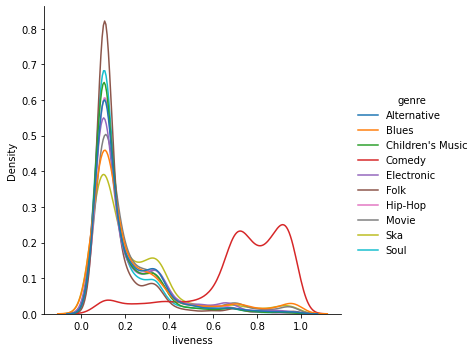

In [21]:
sns.displot(data=training, x="liveness", hue="genre", kind="kde")

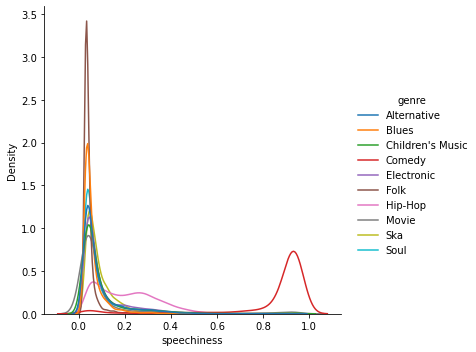

In [22]:
sns.displot(data=training, x="speechiness", hue="genre", kind="kde")

- Each genre has different mean values for the ‘popularity’ variable.

- ‘Comedy’ and ‘Movie’ variables have a different mean of acousticness compared to other genres, and their acoutsticness values tend to be larger.

- Comedy has a vastly different distribution of liveness and speechiness compared to other genres, and the means values are close to 1, while the rest are more toward 0.

# Developing and testing your machine learning system

## Data Pre-processing

### Splitting the data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
features = ['artist_name', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
            'valence']
X_train = training.loc[:, features]
y_train = training.loc[:, ['genre']]

X_test = test.loc[:, features]

In [25]:
cat = X_train[['artist_name', 'key', 'mode', 'time_signature']]
num = X_train[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness',
               'loudness', 'speechiness', 'tempo', 'valence']]

### Numerical features

In [26]:
print("Total number of missing values in duration_ms: " + str(len(X_train[X_train['duration_ms'] == -1])))
print("Total number of missing values in tempo: " + str(len(X_train[X_train['tempo'] == '?'])))

Total number of missing values in duration_ms: 10022
Total number of missing values in tempo: 7461


In [27]:
num.loc[num['duration_ms'] == -1, 'duration_ms'] = np.NaN
num.loc[num['tempo'] == '?', 'tempo'] = np.NaN
num["tempo"] = num.tempo.astype(float)

In [28]:
from sklearn.impute import SimpleImputer

Imputer = SimpleImputer(missing_values=np.NaN, strategy='mean').fit(num)

num_imputed = Imputer.transform(num)
num = pd.DataFrame(num_imputed, columns=num.columns)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(num)

num_scaled = scaler.transform(num)
num = pd.DataFrame(num_scaled, columns=num.columns)

- Drop ‘instance_id’, ‘track_name’ and ‘track_id’ variables since each instance has unique values, which are shown from the Kaggle Data Explorer page. However, they won’t help predict the genre of a given song.
- Replace missing values in 'duration_ms' and 'tempo' to np.NaN.
- Change the ‘tempo’ variable type to float.
- Impute the missing values with mean.
- Normalised the numeric values.

### Categorical features

In [31]:
print("Total number of missing values in artist_name: " + str(len(X_train[X_train['artist_name'] == 'empty_field'])))
print("Total number of missing values in time_signature: " + str(len(X_train[X_train['time_signature'] == '0/4'])))

Total number of missing values in artist_name: 10065
Total number of missing values in time_signature: 0


In [32]:
cat.loc[cat['artist_name'] == 'empty_field', 'artist_name'] = np.NaN
cat.loc[cat['time_signature'] == '0/4', 'time_signature'] = np.NaN

In [33]:
cat = cat.fillna('Missing')

In [34]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False).fit(cat[['artist_name', 'time_signature', 'mode']])
cat_one_hot = ohe.transform(cat[['artist_name', 'time_signature', 'mode']])

In [35]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder().fit(cat[['key']])
cat_ordinal = enc.transform(cat[['key']])

In [36]:
cat = np.concatenate([cat_one_hot, cat_ordinal], axis=1)

- Replace missing values in 'artist_name' and 'time_signature' to np.NaN.
- Fill the missing values with a new category “Missing”.
- One hot encoding for 'artist_name', 'time_signature' and 'mode' variables.
- Ordinal encoding for ‘key’ variable.
- Note that I didn’t do anything about the variables with high correlations because their correlation values are below 0.85, and we have limited features.

### Pre-processed Data

In [37]:
X_train_preprocessed = np.concatenate([num.values, cat], axis=1)

In [38]:
def preprocess(df):
    
    cat = df[['artist_name', 'key', 'mode', 'time_signature']]
    num = df[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness',
               'loudness', 'speechiness', 'tempo', 'valence']]
    
    # Numeric Variables
    num.loc[num['duration_ms'] == -1, 'duration_ms'] = np.NaN
    num.loc[num['tempo'] == '?', 'tempo'] = np.NaN
    num["tempo"] = num.tempo.astype(float)
    
    num_imputed = Imputer.transform(num)
    num = pd.DataFrame(num_imputed, columns=num.columns)
    
    num_scaled = scaler.transform(num)
    num = pd.DataFrame(num_scaled, columns=num.columns)
    
    # Categorical Variables
    cat.loc[cat['artist_name'] == 'empty_field', 'artist_name'] = np.NaN
    cat.loc[cat['time_signature'] == '0/4', 'time_signature'] = np.NaN
    cat = cat.fillna('Missing')
    
    cat_one_hot = ohe.transform(cat[['artist_name', 'time_signature', 'mode']])
    cat_ordinal = enc.transform(cat[['key']])
    cat = np.concatenate([cat_one_hot, cat_ordinal], axis=1)
    
    return np.concatenate([num.values, cat], axis=1)

In [39]:
X_test_preprocessed = preprocess(X_test)

## Machine Learning Modelling
### Initial design 

To prevent overfitting the test set, I’m using the 5-fold cross-validation to help me get an unbiased estimate of the model when comparing or selecting between final models.

As this is a classification problem, I have chosen 5 models that I’ve learned before from the sklearn package. They are Naive Bayes, Logistic Regression, Decision Tree, K Nearest Neighbour, and Random Forest.

For my first try, I used the default parameters for all my models to see the accuracies before feature selection and hyperparameters tuning. I have also set the random state as 0 to get the same results every time. Here are the accuracies for each model:
- Naive Bayes (66.4%) 
- Logistic Regression (63.8%)
- Decision Tree (53.2%)
- K Nearest Neighbour (59.0%)
- Random Forest (65.8%)

I was going to use Support Vector Machines and Gradient Boosting, but they took forever to run, and I couldn’t get the results, even though I’ve tried to set the maximum iterations, etc.

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_preprocessed,y_train,cv=3)
print(cv)
print(cv.mean())

[0.66634667 0.65884682 0.66572663]
0.6636400417317466


In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
cv = cross_val_score(lr,X_train_preprocessed,y_train,cv=3)
print(cv)
print(cv.mean())

[0.64180716 0.6348473  0.6375255 ]
0.6380599893102342


In [44]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state = 0)
cv = cross_val_score(dt,X_train_preprocessed,y_train,cv=3)
print(cv)
print(cv.mean())

[0.53230935 0.53194936 0.53180127]
0.5320199956255286


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_preprocessed,y_train,cv=3)
print(cv)
print(cv.mean())

[0.59122818 0.59074819 0.58880355]
0.5902599708716254


In [130]:
from sklearn.ensemble import RandomForestClassifier ##max_depth

rf = RandomForestClassifier(random_state = 0)
cv = cross_val_score(rf,X_train_preprocessed,y_train,cv=3)
print(cv)
print(cv.mean())

KeyboardInterrupt: 

In [47]:
gnb.fit(X_train_preprocessed, y_train)
pred = gnb.predict(X_test_preprocessed)

result = pd.DataFrame({
    "instance_id": test["instance_id"],
    "genre": pred
})
result.to_csv('out.csv', index=False)

In [131]:
rf = RandomForestClassifier(random_state = 0)

rf.fit(X_train_preprocessed, y_train)
pred = rf.predict(X_test_preprocessed)

result = pd.DataFrame({
    "instance_id": test["instance_id"],
    "genre": pred
})
result.to_csv('out_rf1.csv', index=False)

### Second Model (Feature Selection)
#### Standardize the Data

In [50]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X_train_preprocessed)
X_train_standardized = scaler.transform(X_train_preprocessed)

array([[ 0.29217079, -0.36742029,  1.70931276, ..., -1.42404965,
         1.42404965,  0.77264199],
       [ 0.51188111,  0.9161169 ,  1.8159511 , ..., -1.42404965,
         1.42404965, -1.25147981],
       [ 0.56680869, -0.3294976 ,  0.10973763, ...,  0.70222271,
        -0.70222271, -1.54064007],
       ...,
       [ 0.18231563, -0.81636659,  1.40194342, ..., -1.42404965,
         1.42404965, -0.6731593 ],
       [ 0.23724321,  1.09697895, -1.81602537, ...,  0.70222271,
        -0.70222271, -0.09483878],
       [ 0.07246046,  0.18100014,  0.02191782, ..., -1.42404965,
         1.42404965,  1.64012276]])

#### PCA

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, random_state=0).fit(X_train_standardized)   
pca_train = pca.transform(X_train_standardized)

In [70]:
X_test_standardized = scaler.transform(X_test_preprocessed)
pca_test = pca.transform(X_test_preprocessed) 

In [71]:
cv = cross_val_score(gnb,pca_train,y_train,cv=3)
print(cv)
print(cv.mean())

[0.49727005 0.50110998 0.49483979]
0.49773994199703187


In [72]:
cv = cross_val_score(lr,pca_train,y_train,cv=3)
print(cv)
print(cv.mean())

[0.54028919 0.54076918 0.53300132]
0.5380198996284085


In [73]:
cv = cross_val_score(dt,pca_train,y_train,cv=3)
print(cv)
print(cv.mean())

[0.49325013 0.49415012 0.49231969]
0.49323998159422383


In [74]:
cv = cross_val_score(knn,pca_train,y_train,cv=3)
print(cv)
print(cv.mean())

[0.60712786 0.60886782 0.61034441]
0.6087800312876498


In [75]:
cv = cross_val_score(rf,pca_train,y_train,cv=3)
print(cv)
print(cv.mean())

[0.6201476  0.6200276  0.61832473]
0.6194999764951298


#### Other method

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train_new = SelectKBest(chi2, k=10).fit_transform(X_train_preprocessed, y_train)

In [93]:
cv = cross_val_score(gnb,X_train_new,y_train,cv=3)
print(cv)
print(cv.mean())

[0.4399712  0.4401512  0.42901716]
0.4363798527461588


In [94]:
cv = cross_val_score(lr,X_train_new,y_train,cv=3)
print(cv)
print(cv.mean())

[0.50746985 0.50566989 0.49693988]
0.5033598716001199


In [95]:
cv = cross_val_score(dt,X_train_new,y_train,cv=3)
print(cv)
print(cv.mean())

[0.44297114 0.44759105 0.44449778]
0.4450199895558071


In [96]:
cv = cross_val_score(knn,X_train_new,y_train,cv=3)
print(cv)
print(cv.mean())

[0.50338993 0.49883002 0.4899796 ]
0.49739985159495176


In [97]:
cv = cross_val_score(rf,X_train_new,y_train,cv=3)
print(cv)
print(cv.mean())

[0.55120898 0.54244915 0.5376215 ]
0.5437598772325526


### Third Model (Hyperparameter Tuning)

In [121]:
from sklearn.model_selection import GridSearchCV 

gnb = GaussianNB()
param_grid = {'var_smoothing': [0.0000001, 0.00000001, 0.00000001]}

clf_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=3, verbose = True, n_jobs = -1) 
best_clf_gnb = clf_gnb.fit(X_train_preprocessed,y_train)
print('Best Score: ' + str(best_clf_gnb.best_score_))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Score: 0.6652800593334107


In [103]:
lr = LogisticRegression(random_state = 0)
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_preprocessed,y_train)
print('Best Score: ' + str(best_clf_lr.best_score_))

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best Score: 0.7859399622279964


In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7],
              'weights' : ['uniform', 'distance']}

clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_preprocessed,y_train)
print('Best Score: ' + str(best_clf_knn.best_score_))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 

rf = RandomForestClassifier(random_state = 0)
param_grid =  {'n_estimators': [100,500], 
               'bootstrap': [True,False],
               'max_depth': [3,5],
               'min_samples_leaf': [1,2,4]}
                                  
clf_rf = RandomizedSearchCV(rf, param_distributions = param_grid, cv = 3, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_preprocessed,y_train)

In [124]:
print('Best Score: ' + str(best_clf_rf.best_score_))

Best Score: 0.5080402124106803


In [127]:
pred = best_clf_lr.predict(X_test_preprocessed)

result = pd.DataFrame({
    "instance_id": test["instance_id"],
    "genre": pred
})
result.to_csv('out_hyper.csv', index=False)